# **JAMBOREE BUSINESS CASE STUDY**

## **PROBLEM STATEMENT**

---

Jamboree wants to help Indian students estimate their probability of admission to top foreign universities. Using historical admission data, the goal is to identify key factors influencing admission chances and build a predictive model.

Objective

-  Understand which applicant attributes most influence admission probability

- Study relationships among these attributes

- Build and evaluate a Linear Regression model to predict Chance of Admit

---

**CHANCE OF ADMIT** is chosen as the target variable because it represents the final outcome of the admission process and is influenced by applicants’ academic and profile-related features.

## **MODULES' IMPORT**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **DATA UPLOAD**

In [ ]:
!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/839/original/Jamboree_Admission.csv

--2026-01-29 05:59:30--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/839/original/Jamboree_Admission.csv
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 108.157.143.117, 108.157.143.111, 108.157.143.215, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|108.157.143.117|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16176 (16K) [text/plain]
Saving to: ‘Jamboree_Admission.csv.2’

Jamboree_Admission. 100%[===================>]  15.80K  --.-KB/s    in 0.004s  

2026-01-29 05:59:30 (3.85 MB/s) - ‘Jamboree_Admission.csv.2’ saved [16176/16176]



In [ ]:
df = pd.read_csv('Jamboree_Admission.csv')
df.head(1)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92


- Serial No. is a unique row identifier and is dropped to prevent the model from learning spurious patterns.

In [ ]:
df = df.drop(columns=['Serial No.'],axis=1)
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
df.shape # (rows, columns)

(500, 8)

In [ ]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [ ]:
df.rename(columns={'Chance of Admit ':'Chance of Admit'},inplace=True)

In [ ]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit'],
      dtype='object')

## **BASIC METRICS**

In [ ]:
df.dtypes # All variables are numerical

,0
GRE Score,int64
TOEFL Score,int64
University Rating,int64
SOP,float64
LOR,float64
CGPA,float64
Research,int64
Chance of Admit,float64


In [ ]:
df.isna().sum() # 0 => No NULL values => clean data

,0
GRE Score,0
TOEFL Score,0
University Rating,0
SOP,0
LOR,0
CGPA,0
Research,0
Chance of Admit,0


In [ ]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


## **EXPLORATORY DATA ANALYSIS (EDA):**

### **UNIVARIATE ANALYSIS**

#### **Continuous Variables**

- **GRE SCORE**

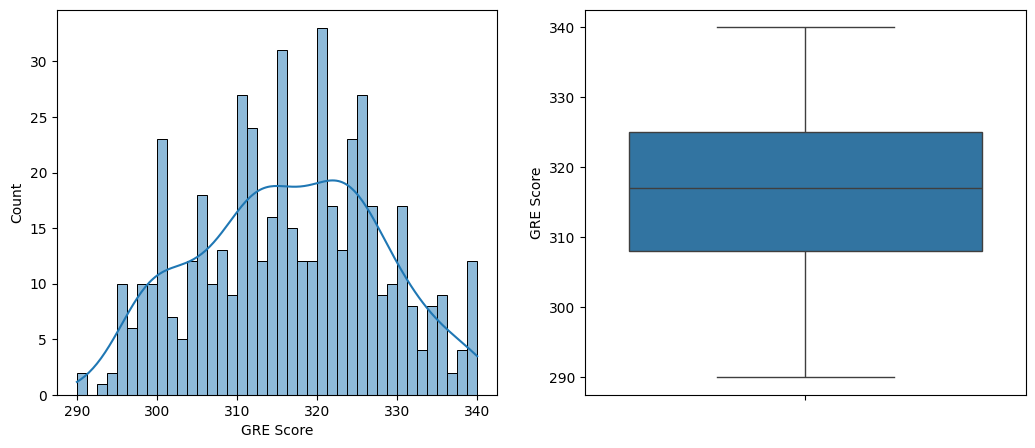

In [ ]:
plt.figure(figsize=(12.5,5))
plt.subplot(1,2,1)
sns.histplot(df['GRE Score'],bins=40,kde=True)
plt.subplot(1,2,2)
sns.boxplot(df['GRE Score'])
plt.show()

- *GRE scores exhibit a reasonably wide range with a fairly symmetric to mildly right-skewed distribution. The spread indicates representation across varied academic aptitude levels, making GRE a potentially informative predictor for modeling admission chances. No extreme outliers are observed.*

- **TOEFL SCORE**

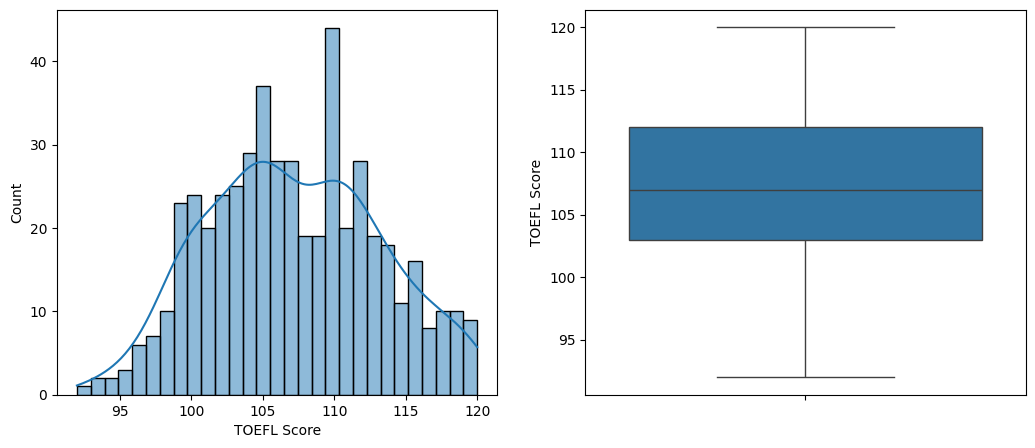

In [ ]:
plt.figure(figsize=(12.5,5))
plt.subplot(1,2,1)
sns.histplot(df['TOEFL Score'],bins=29,kde=True)
plt.subplot(1,2,2)
sns.boxplot(df['TOEFL Score'])
plt.show()

- *TOEFL scores show moderate spread with a slightly left-skewed distribution, suggesting a higher concentration of applicants with stronger English proficiency. The range is sufficiently broad to capture variation in language skills relevant for admission outcomes.*

- **CGPA**

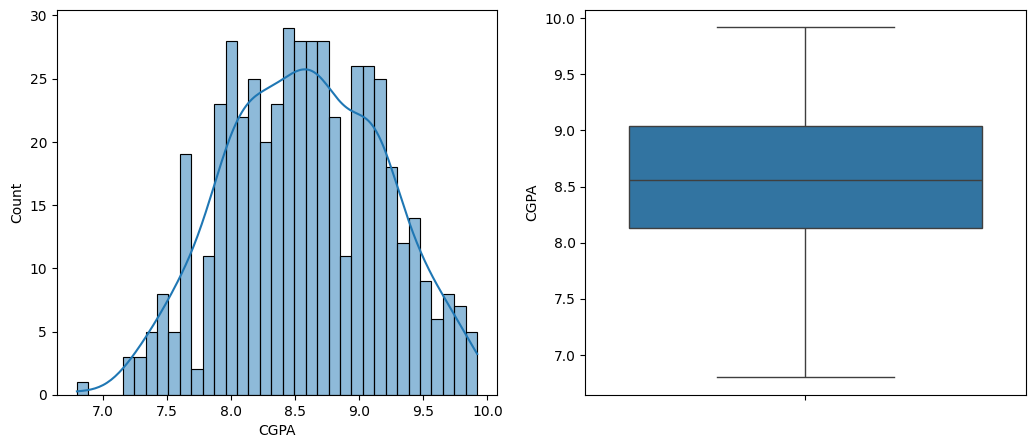

In [ ]:
plt.figure(figsize=(12.5,5))
plt.subplot(1,2,1)
sns.histplot(df['CGPA'],bins=35,kde=True)
plt.subplot(1,2,2)
sns.boxplot(df['CGPA'])
plt.show()

- *CGPA values are well distributed across a wide academic performance range and display a near-normal to mildly left-skewed distribution. This indicates the presence of both average and high-performing students, supporting CGPA as a key explanatory variable for admission probability.*

- **CHANCE OF ADMIT (TARGET VARIABLE)**

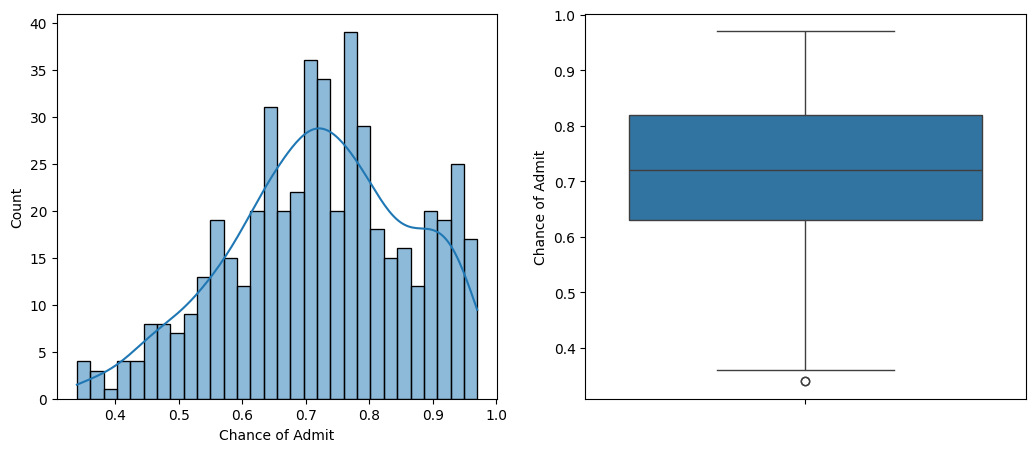

In [ ]:
plt.figure(figsize=(12.5,5))
plt.subplot(1,2,1)
sns.histplot(df['Chance of Admit'],bins=30,kde=True)
plt.subplot(1,2,2)
sns.boxplot(df['Chance of Admit'])
plt.show()

- *Chance of Admit shows a continuous distribution with adequate spread across low to high probabilities and slight left skewness. This indicates meaningful variation in admission outcomes, making it suitable for regression modeling without heavy concentration at extreme values.*

##### **Categorical / Discrete**

- **UNIVERSITY RATING**

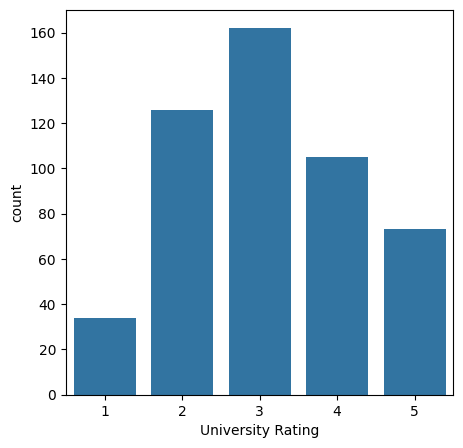

In [ ]:
plt.figure(figsize=(5,5))
sns.countplot(x=df['University Rating'])
plt.show()

- *University ratings are concentrated between mid to higher tiers, with fewer observations at the lowest rating. This suggests that most applicants target moderately to highly ranked universities, introducing **ordinal variation** that may influence admission chances.*

- **RESEARCH**

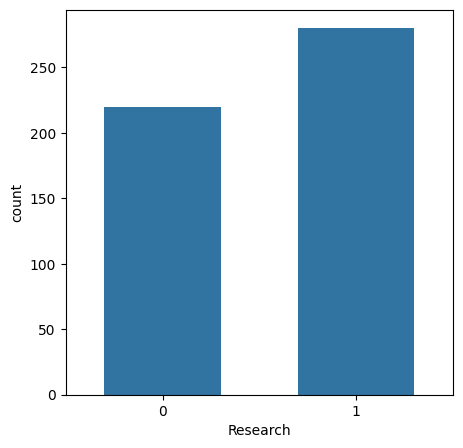

In [ ]:
plt.figure(figsize=(5,5))
sns.countplot(x=df['Research'],width=0.6)
plt.show()

- *The dataset shows a fairly balanced distribution between applicants with and without research experience, indicating sufficient representation of both groups for assessing its impact on admission probability.*

---

- *Overall, the univariate distributions indicate adequate variability across predictors and the target variable, justifying further bivariate and multivariate analysis for regression modeling*

### **BIVARIATE ANALYSIS**

- **GRE SCORE v/s CHANCE OF ADMIT**

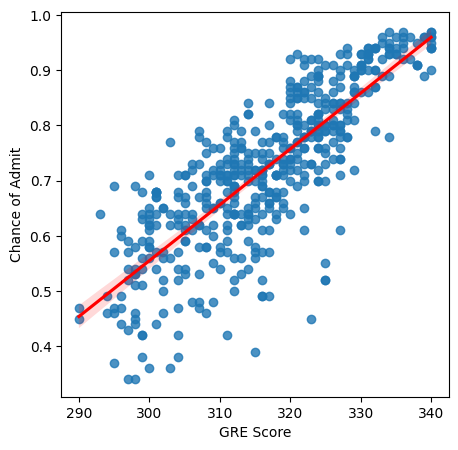

In [ ]:
plt.figure(figsize=(5,5))
sns.regplot(x=df['GRE Score'],y=df['Chance of Admit'], line_kws={'color':'red'})
plt.show()

- *GRE score shows a clear positive and approximately linear relationship with Chance of Admit. As GRE scores increase, admission probability rises consistently, indicating GRE as a strong predictor suitable for linear regression modeling.*

- **TOEFL SCORE v/s CHANCE OF ADMIT**

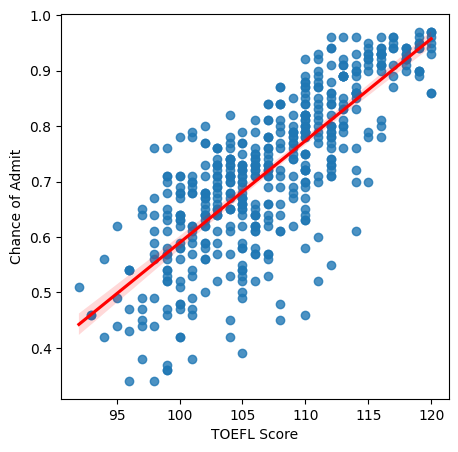

In [ ]:
plt.figure(figsize=(5,5))
sns.regplot(x=df['TOEFL Score'],y=df['Chance of Admit'], line_kws={'color':'red'})
plt.show()

- *TOEFL score exhibits a positive linear association with Chance of Admit, suggesting that applicants with higher English proficiency tend to have higher admission probabilities. The relationship appears stable across the score range, supporting its inclusion as a continuous predictor.*

- **CGPA v/s CHANCE OF ADMIT**

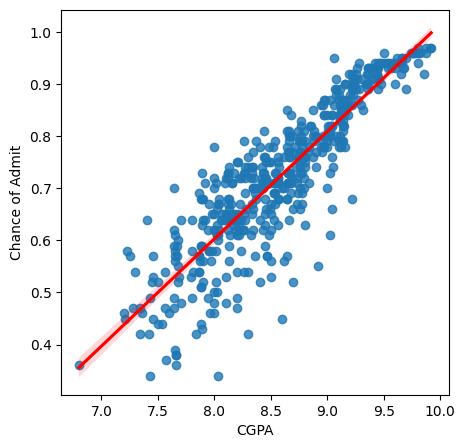

In [ ]:
plt.figure(figsize=(5,5))
sns.regplot(x=df['CGPA'],y=df['Chance of Admit'], line_kws={'color':'red'})
plt.show()

- *CGPA demonstrates a strong positive linear relationship with Chance of Admit, with higher academic performance corresponding to higher admission probability. Among the examined predictors, CGPA shows one of the strongest associations with the target variable.*

- *This suggests CGPA is likely to be a **dominant explanatory variable** in the regression model.*

- **RESEARCH v/s CHANCE OF ADMIT**

<Axes: xlabel='Research', ylabel='Chance of Admit'>

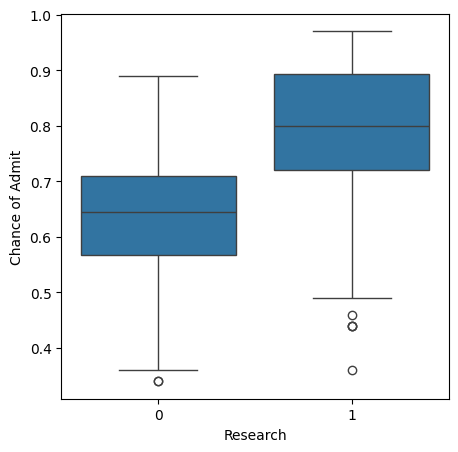

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(x=df['Research'],y=df['Chance of Admit'])

- *Applicants with prior research experience exhibit a higher median Chance of Admit compared to those without research experience. This indicates that research exposure is positively associated with admission probability and may contribute additional explanatory power when included as a binary predictor.*

---

- *Overall, the bivariate analysis reveals **predominantly linear relationships between key predictors and the target variable**, providing empirical support for the use of linear regression in subsequent modeling.*

### **MULTIVARIATE ANALYSIS - CORRELATION HEATMAP**

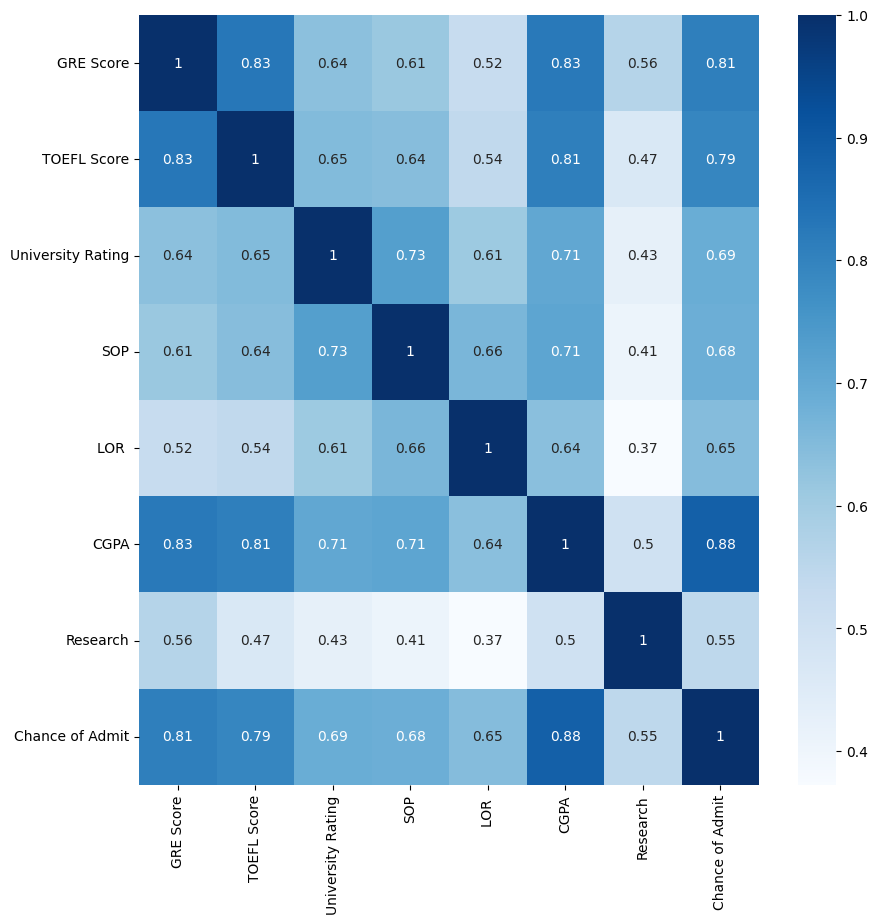

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap='Blues')
plt.show()

- *Several predictors exhibit moderate correlation (e.g., GRE–TOEFL, SOP–LOR), motivating a formal multicollinearity assessment using VIF in the modeling stage.*

---

## **LINEAR REGRESSION MODELING**

- Based on the insights obtained from exploratory data analysis, we now proceed to build and evaluate a Linear Regression model to predict the Chance of Admit.

### **DATA PREPARATION & MODELING**

In [ ]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

In [ ]:
X = df.drop(columns=['Chance of Admit'],axis=1)
y = df['Chance of Admit']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=111)

In [ ]:
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

### **OLS MODEL BUILDING (STATSMODEL)**

In [ ]:
model_sm = sm.OLS(y_train,X_train_sm).fit()

In [ ]:
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:        Chance of Admit   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     253.1
Date:                Thu, 29 Jan 2026   Prob (F-statistic):          3.77e-141
Time:                        05:59:36   Log-Likelihood:                 567.06
No. Observations:                 400   AIC:                            -1118.
Df Residuals:                     392   BIC:                            -1086.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.2649      0.11

***Preliminary OLS Model Summary (Before Diagnostic Validation)***

- *The initial OLS model explains a substantial proportion of variance in the target variable, with an R² of 0.819 and an adjusted R² of 0.816, indicating strong overall explanatory power. The model is statistically significant, as evidenced by the highly significant F-statistic (p < 0.001).*

- *CGPA, GRE Score, TOEFL Score, LOR, and Research experience show positive and statistically significant associations with Chance of Admit, suggesting that academic performance metrics and research exposure are key drivers of admission probability. SOP does not appear to be statistically significant in the presence of other predictors, while University Rating shows marginal significance.*

- *Correlation analysis and the relatively large condition number indicate the possibility of multicollinearity, motivating a formal Variance Inflation Factor (VIF) assessment in the subsequent section. At this stage, coefficient estimates are treated as preliminary, pending diagnostic validation.*

---

*Overall, the OLS results indicate that academic performance metrics and research experience are key drivers of admission probability. Formal assumption testing is conducted next to validate the reliability of the model.*

### **ASSUMPTION TESTING**

#### **Multicollinearity (VIF)**

In [ ]:
# Calculate initial VIFs

from statsmodels.stats.outliers_influence import variance_inflation_factor

X_vif = X_train.copy()
X_vif = sm.add_constant(X_vif)

vif_df = pd.DataFrame()
vif_df['Feature'] = X_vif.columns
vif_df['VIF'] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

vif_df

,Feature,VIF
0,const,1538.904154
1,GRE Score,4.242709
2,TOEFL Score,3.684655
3,University Rating,2.736957
4,SOP,2.893488
5,LOR,1.965700
6,CGPA,4.741030
7,Research,1.416635


In [ ]:
# Drop variables iteratively (for VIF > 5)

from statsmodels.stats.outliers_influence import variance_inflation_factor

def Calculate_vif(X):
  X = sm.add_constant(X)
  vif = pd.DataFrame()
  vif['Feature'] = X.columns
  vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
  return vif

X_vif = X_train.copy()

while True:
  vif_df = Calculate_vif(X_vif)
  vif_df = vif_df[vif_df['Feature'] != 'const']
  max_vif = vif_df['VIF'].max()

  if max_vif > 5:
    dropped_feature = vif_df.sort_values(by='VIF',ascending=False).iloc[0]['Feature']
    print(f"Dropping '{dropped_feature}' with VIF = {max_vif:.2f}")
    X_vif = X_vif.drop(columns=[dropped_feature],axis=1)
  else:
    break

vif_df

,Feature,VIF
1,GRE Score,4.242709
2,TOEFL Score,3.684655
3,University Rating,2.736957
4,SOP,2.893488
5,LOR,1.965700
6,CGPA,4.741030
7,Research,1.416635


In [ ]:
# Build final OLS model with reduced features

X_train_final = sm.add_constant(X_vif)
model_sm_final = sm.OLS(y_train,X_train_final).fit()
print(model_sm_final.summary())

                            OLS Regression Results                            
Dep. Variable:        Chance of Admit   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     253.1
Date:                Thu, 29 Jan 2026   Prob (F-statistic):          3.77e-141
Time:                        05:59:36   Log-Likelihood:                 567.06
No. Observations:                 400   AIC:                            -1118.
Df Residuals:                     392   BIC:                            -1086.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.2649      0.11

***Final OLS Model Interpretation (Post Multicollinearity Check)***

- *Variance Inflation Factor (VIF) analysis indicates that all predictor variables have VIF values below the acceptable threshold of 5, suggesting that multicollinearity is not a significant concern in the model. As a result, no predictors were removed, and the model specification remains unchanged.*

- *The final OLS model continues to demonstrate strong explanatory power (R² = 0.819, Adjusted R² = 0.816) and remains statistically significant overall. CGPA emerges as the strongest predictor of admission probability, followed by GRE Score, TOEFL Score, LOR, and Research experience, all of which show positive and statistically significant relationships with Chance of Admit.*

- *These results confirm that the model estimates are stable and reliable, allowing subsequent assumption testing and performance evaluation to be conducted with confidence.*

---

#### **Mean of Residuals**

In [ ]:
# Get residuals from the final OLS model
residuals = model_sm_final.resid

# Calculate mean of residuals
residuals.mean()

np.float64(-7.963074644123936e-16)

- *The residual mean is numerically close to zero, indicating that the model does not exhibit systematic over- or under-prediction.*

#### **Linearity: Residuals vs Fitted Plot**

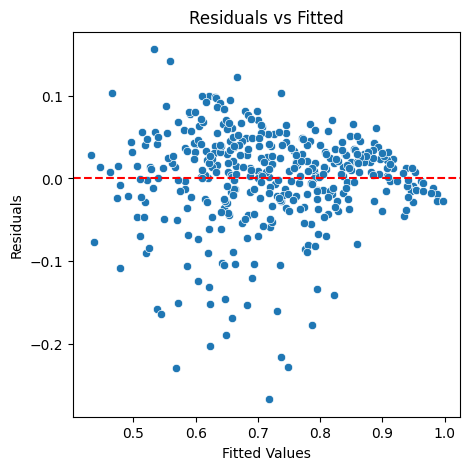

In [ ]:
fitted_vals = model_sm_final.fittedvalues
residuals = model_sm_final.resid

plt.figure(figsize=(5,5))
sns.scatterplot(x=fitted_vals, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted')
plt.show()

- *The residuals are randomly scattered around zero with no clear systematic pattern, indicating that the linearity assumption is reasonably satisfied.*

#### **Homoscedasticity**

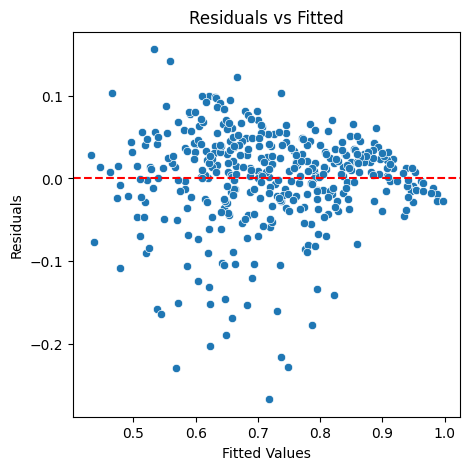

In [ ]:
# Reuse fitted values and residuals

plt.figure(figsize=(5,5))
sns.scatterplot(x=fitted_vals, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted')
plt.show()

In [ ]:
from statsmodels.stats.diagnostic import het_breuschpagan

# Breusch-Pagan test : to detect the presence of heteroskedasticity in a linear regression model

bp_test = het_breuschpagan(residuals, X_train_final)
bp_labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']

dict(zip(bp_labels, bp_test))

{'LM Statistic': np.float64(18.810768572259917),
 'LM-Test p-value': np.float64(0.008801254083292643),
 'F-Statistic': np.float64(2.7634648442219754),
 'F-Test p-value': np.float64(0.00818167220480374)}

- *Homoscedasticity was first assessed visually using the **residuals vs fitted plot**, which did not show a strong funnel-shaped pattern. As an additional statistical check, the **Breusch–Pagan test** was performed and yielded a significant p-value, indicating mild heteroscedasticity. This is acknowledged as a limitation and is addressed using robust standard errors in subsequent interpretation.*

#### **Normality of Residuals**

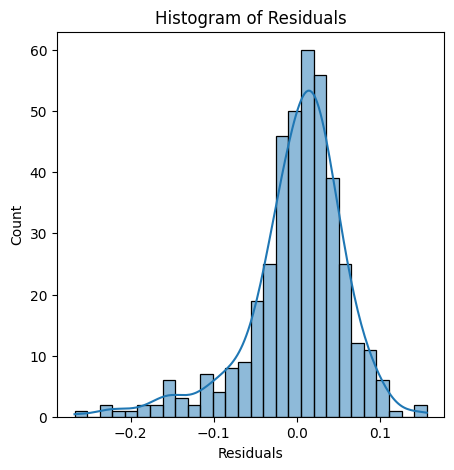

In [ ]:
plt.figure(figsize=(5,5))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Histogram of Residuals')
plt.show()

<Figure size 500x500 with 0 Axes>

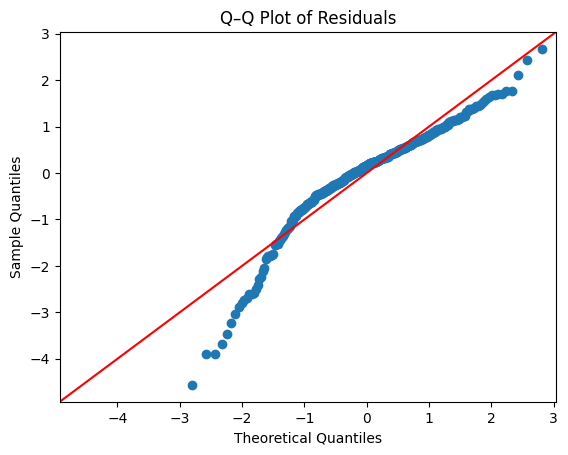

In [ ]:
plt.figure(figsize=(5,5))
sm.qqplot(residuals, line='45', fit=True)
plt.title('Q–Q Plot of Residuals')
plt.show()

- *The histogram of residuals shows an **approximately bell-shaped** distribution centered around zero. The Q–Q plot indicates that residuals **largely follow the theoretical normal line**, with slight deviations at the tails. Such deviations are common in real-world datasets and are acceptable for linear regression. Hence, the **normality assumption is reasonably satisfied**.*

### **MODEL EVALUATION**

In [ ]:
# 1. Predictions (Train & Test)

y_train_pred = model_sm_final.predict(X_train_final)
y_test_pred  = model_sm_final.predict(X_test_sm)

In [ ]:
# 2. Metrics Calculation

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Train metrics
mae_train = mean_absolute_error(y_train, y_train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2_train = r2_score(y_train, y_train_pred)

# Test metrics
mae_test = mean_absolute_error(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_test = r2_score(y_test, y_test_pred)

print(f"Train MAE: {mae_train:.7f}")
print(f"Train RMSE: {rmse_train:.7f}")
print(f"Train R2: {r2_train:.7f}")
print(f"Test MAE: {mae_test:.7f}")
print(f"Test RMSE: {rmse_test:.7f}")
print(f"Test R2: {r2_test:.7f}")

Train MAE: 0.0419143
Train RMSE: 0.0586254
Train R2: 0.8188548
Test MAE: 0.0443797
Test RMSE: 0.0632136
Test R2: 0.8298546


In [ ]:
# 3. Adjusted R² (Train & Test)

def adjusted_r2(r2, n, k):
    return 1 - (1 - r2) * (n - 1) / (n - k - 1)

adj_r2_train = adjusted_r2(r2_train, X_train_final.shape[0], X_train_final.shape[1]-1)
adj_r2_test  = adjusted_r2(r2_test,  X_test_sm.shape[0],  X_test_sm.shape[1]-1)

print(f"Train Adjusted R2: {adj_r2_train:.7f}")
print(f"Test Adjusted R2: {adj_r2_test:.7f}")

Train Adjusted R2: 0.8156201
Test Adjusted R2: 0.8169087


***Model Performance Evaluation***

- *The model exhibits consistent performance across training and test datasets, indicating good generalization. The MAE values for training (≈ 0.042) and testing (≈ 0.044) are comparable, suggesting **stable average prediction errors**. Similarly, RMSE remains low and close across both sets, reflecting **controlled error variance**.*

- *The model explains a **substantial proportion of variability in the target variable**, with R² values of approximately 0.82–0.83 for both training and test data. The adjusted R² values also remain consistent (~0.816), reinforcing that the model performance is not driven by overfitting.*

*Overall, the similarity between training and test metrics indicates that the model generalizes well, with **no major overfitting observed**. The close alignment between train and test performance metrics suggests a robust and **reliable linear regression model**.*

### **RIDGE & LASSO**

In [ ]:
# 1. Scale features (MANDATORY for Ridge/Lasso)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train_final.drop(columns='const'))
X_test_scaled  = scaler.transform(X_test_sm.drop(columns='const'))

In [ ]:
# 2. Fit Ridge & Lasso models

from sklearn.linear_model import Ridge, Lasso

ridge = Ridge(alpha=1.0)
lasso = Lasso(alpha=0.01)

ridge.fit(X_train_scaled, y_train)
lasso.fit(X_train_scaled, y_train)

Lasso(alpha=0.01)

In [ ]:
# 3. Compare coefficients

coef_df = pd.DataFrame({'Feature': X_train_final.drop(columns='const').columns,
                        'OLS': model_sm_final.params.drop('const').values,
                        'Ridge': ridge.coef_,
                        'Lasso': lasso.coef_
                       })
coef_df

,Feature,OLS,Ridge,Lasso
0,GRE Score,0.002071,0.022914,0.022011
1,TOEFL Score,0.002496,0.015174,0.011819
2,University Rating,0.007908,0.009137,0.006383
3,SOP,0.000620,0.000786,0.000000
4,LOR,0.016948,0.015711,0.011117
5,CGPA,0.112449,0.066919,0.068660
6,Research,0.025255,0.012523,0.006696


***Ridge & Lasso Regression – Interpretation***

- *The coefficient comparison shows that Ridge regression retains all predictors while shrinking their magnitudes relative to OLS, indicating improved coefficient stability in the presence of correlated features. **The relative importance of key predictors such as CGPA, GRE Score, LOR, and Research remains consistent across OLS and Ridge models**.*

- *Lasso regression further penalizes coefficients **bold text** and sets the SOP coefficient to zero, **effectively performing feature selection**. This suggests that **SOP contributes limited additional explanatory power** once other academic and qualitative factors are accounted for.*

- *Overall, the regularized models confirm the robustness of the OLS results while highlighting that regularization can help reduce coefficient variance and mitigate multicollinearity. However, since predictive performance does not improve materially, OLS remains an appropriate and interpretable choice for this problem.*

*Regularization improves coefficient stability but does not significantly alter model conclusions, reinforcing the suitability of the OLS model*

---

## **ACTIONABLE INSIGHTS & RECOMMENDATIONS**

### **BUSINESS-ORIENTED INSIGHTS**

- ***Academic performance is the strongest driver of admission probability.** CGPA emerges as the most influential predictor, followed by GRE and TOEFL scores. This indicates that sustained academic consistency combined with standardized test performance plays a critical role in graduate admissions.*

- ***Research experience provides a meaningful competitive advantage.** Applicants with prior research exposure consistently demonstrate higher admission probabilities, even after controlling for academic metrics, highlighting research as a key differentiator for borderline profiles.*

- ***Qualitative components have limited incremental impact when academic signals are strong.** SOP shows minimal contribution once other variables are accounted for, while LOR remains significant, suggesting that third-party academic endorsements carry more weight than self-reported narratives.*

- ***University rating has an indirect influence on admission outcomes.** While not strongly significant on its own, university rating likely acts as a proxy for applicant selectivity and peer competition, influencing admission probability indirectly.*

### **RECOMMENDATIONS FOR JAMBOREE**

- ***Guide students to prioritize CGPA and standardized test preparation early.** Since these variables exert the strongest influence, targeted interventions in academic planning and test strategy can yield the highest return on effort.*

- ***Encourage research exposure for applicants with marginal academic profiles.** Facilitating research internships, projects, or publications can meaningfully improve admission chances for candidates near cutoff thresholds.*

- ***Position the admission probability tool as a decision-support system.** The model should be used to set realistic expectations and guide profile improvement strategies rather than as a deterministic admission predictor.*

### **MODEL IMPROVEMENT OPPORTUNITIES**

- ***Incorporate work experience and professional exposure**, especially for applicants targeting applied or industry-oriented programs.*

- ***Account for course difficulty and undergraduate institution tier** to better contextualize CGPA.*

- ***Quantify essay quality using NLP-based scoring** to better capture qualitative dimensions currently underrepresented in the model.*

### **EXECUTIVE SUMMARY**

**Admission outcomes are primarily driven by academic strength and research exposure, while qualitative components play a secondary, supporting role. The model demonstrates strong predictive performance with good generalization and can be effectively used as a decision-support tool to guide student profile improvement strategies.**

---

---

---